In [1]:
# !pip3 install nltk
# !pip3 install pymorphy2
# !pip3 install wordcloud

In [2]:
with open("wordcloud.txt") as f:
    text = f.read()

In [3]:
text[:1000] +  '...'

'я один из немногих людей у которого встроенные чипы он работает елка использую каждый день очень часто говорят там чтобы я жил в эпоху перемен эпоха таких перемен еще не жил никто то есть нам всем пока бесконечно повезло все эти когда тоже людям запрещали ездить на автомобилях потому что как же автомобили пугают лошадей когда пошли первые поезда люди же писали что что если разгонитесь больше там 50 километров в час что никогда человек не делал скорейшей человек сойдет с ума это кто ж знал что сейчас поезда ездят сто-двести там 300 километров в час не их проблем я все время говорил айтишниками вудса которыми работаем что то что мы создаём несколько тысяч лет на этой земле не существовало вот если мы посмотрим на реальный мир и на то что у нас вообще-то разворачивается история в которой участвует 8 миллиардов человек которая затрагивает всю планету и это история она еще не написана ее реально можно придумать и повлиять и сделать чтобы это произошло управление миром и выстраивание будуще

# Human

In [4]:
from nltk.corpus import stopwords
import pymorphy2

from wordcloud import WordCloud
from matplotlib import pyplot as plt

In [5]:
data = text.split()
len(data)

8029

In [6]:
morph = pymorphy2.MorphAnalyzer()

def filter(words):
    for word in words:
        x = morph.parse(word)[0]
        nf = x.normal_form
        gr = x.tag.grammemes
        if gr & {'ADJF', 'NOUN', 'VERB'}:  # adjectives, nouns, and verbs only
            if nf not in stopwords.words('russian'):
                if 'Apro' not in gr:  # свой, наш, ваш, который...
                    yield nf

normal_words = [w for w in filter(data)]
len(normal_words)

2972

In [7]:
# x = morph.parse('свой')[0]
# x.tag.grammemes

In [8]:
# bigrams
from itertools import pairwise
from collections import Counter

bigrams = []
for a,b in pairwise(normal_words):
    bigrams.append('_'.join((a,b)))

In [11]:
Counter(bigrams).most_common(5)

[('искусственный_интеллект', 15),
 ('человек_мочь', 8),
 ('точка_зрение', 5),
 ('горизонт_планирование', 4),
 ('добро_зло', 4)]

In [12]:
# fix "искусственный интеллект
data2 = ' '.join(normal_words)
data2 = data2.replace("искусственный инт", "искусственный_инт")
normal_words = data2.split()

In [22]:
banned = ['мочь', 'считать', 'часть', 'целое', 'больший', 'меньший', 'суть', 'образ', 'вопрос', 'помощь']

cnt = Counter(normal_words)
for x in banned:
    del cnt[x]

print(*(f"{x}: {c}" for x, c in cnt.most_common(50)), sep='; ')

человек: 82; технология: 38; год: 28; работать: 21; человечество: 21; жизнь: 20; мир: 19; россия: 19; компания: 19; дело: 19; первый: 18; знать: 18; задача: 18; говорить: 17; время: 16; будущее: 16; видеть: 16; искусственный_интеллект: 15; робот: 14; ребёнок: 14; новый: 13; думать: 13; момент: 12; система: 12; уровень: 12; рука: 11; хотеть: 11; страна: 11; смысл: 11; вещь: 11; сделать: 11; история: 10; хороший: 10; ребята: 10; казаться: 9; движение: 9; ситуация: 9; современный: 9; принцип: 9; понимать: 9; получаться: 9; решение: 9; протез: 9; работа: 9; использовать: 8; жить: 8; сказать: 8; деньга: 8; большой: 8; космос: 8


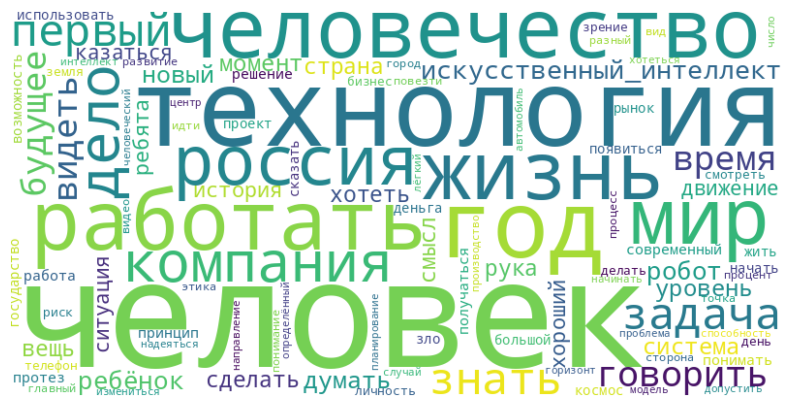

In [24]:
wc = WordCloud(width=800, height=400, background_color="white", max_words=100, random_state=1337, )
wc.generate_from_frequencies(cnt)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Claude 3

>Ты опытный data-scientist, специализирующийся на NLP.
>В переменной text содержится текст статьи. Напиши профессиональный код на python, который выберет наиболее характерные слова в тексте и создаст из них облако тегов. 
>
>Обрати внимание: некоторые из слов для облака тегов могут быть словосочетаниями: например, "искусственный интеллект".
>Необходимо корректно подсчитать наиболее частые слова и словосочетания, чтобы не допустить двойного счета.
>Разумеется, все слова предварительно должны быть преобразованы к начальной форме, а стоп-слова и общеупотребительные русские слова должны быть убраны из текста.
>Напиши только код, без пояснений и комментариев.



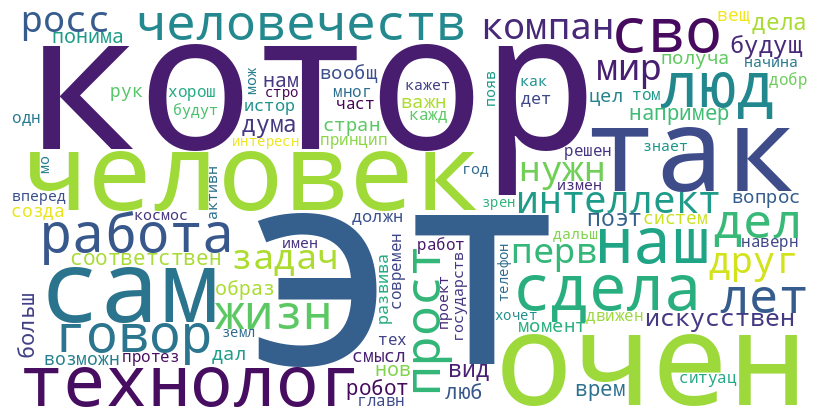

In [38]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# nltk.download('punkt')
# nltk.download('stopwords')

stop_words = set(stopwords.words('russian'))
stemmer = SnowballStemmer('russian')

tokens = word_tokenize(text.lower())
filtered_tokens = [stemmer.stem(token) for token in tokens if token.isalpha() and token not in stop_words]

bigram_measures = BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(filtered_tokens)
bigrams = finder.nbest(bigram_measures.pmi, 100)

unigrams_freq = nltk.FreqDist(filtered_tokens)
bigrams_freq = nltk.FreqDist(bigrams)

wordcloud_dict = {' '.join(bigram): freq for bigram, freq in bigrams_freq.items()}
for unigram, freq in unigrams_freq.items():
    if unigram not in wordcloud_dict:
        wordcloud_dict[unigram] = freq

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100,).generate_from_frequencies(wordcloud_dict)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# !pip3 install spacy

In [ ]:
# !wget https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.7.0/ru_core_news_sm-3.7.0.tar.gz

> Ты опытный data-scientist, специализирующийся на NLP. В переменной text содержится текст статьи. 
>
> Напиши профессиональный код на python, который выберет наиболее характерные слова в тексте и создаст из них облако тегов. Разумеется, все слова предварительно должны быть преобразованы к начальной форме, а стоп-слова и общеупотребительные слова должны быть убраны из текста.
>
>Обрати внимание: некоторые из слов для облака тегов могут быть словосочетаниями: например, "искусственный интеллект". Необходимо корректно подсчитать наиболее частые слова и словосочетания, чтобы не допустить двойного счета.  
>
>Напиши только код, без пояснений и комментариев.
> 
>**Можешь использовать модель spacy для русского языка.**

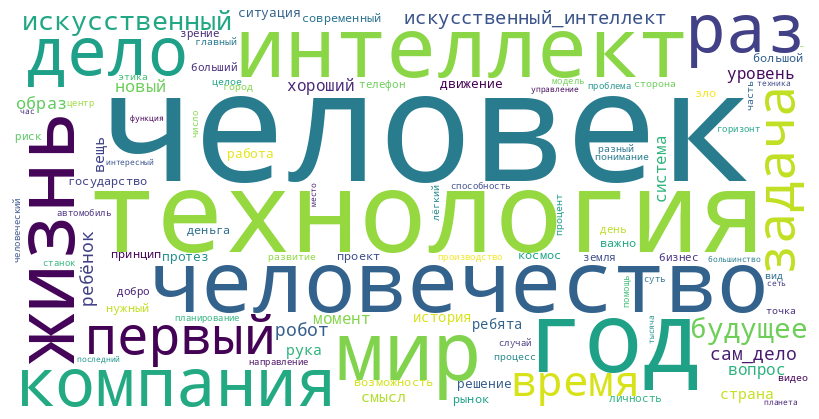

In [46]:
import spacy
import pymorphy2
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

nlp = spacy.load("ru_core_news_sm")
morph = pymorphy2.MorphAnalyzer()

doc = nlp(text)

lemmas = []
for token in doc:
    if not token.is_stop and token.pos_ in ["NOUN", "ADJ"]:
        lemma = morph.parse(token.text)[0].normal_form
        lemmas.append(lemma)

bigrams = []
for token in doc:
    if token.pos_ == "ADJ" and token.head.pos_ == "NOUN":
        bigram = morph.parse(token.text)[0].normal_form + '_' + morph.parse(token.head.text)[0].normal_form
        bigrams.append(bigram)

lemmas.extend(bigrams)

word_freq = Counter(lemmas)

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(word_freq)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

'

# GPT4o
Тот же запроc.

In [40]:
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Загрузка модели spacy для русского языка
nlp = spacy.load("ru_core_news_sm")


# Обработка текста с помощью spacy
doc = nlp(text)

# Функция для лемматизации и фильтрации стоп-слов и пунктуации
def preprocess(doc):
    tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            tokens.append(token.lemma_)
    return tokens

# Извлечение словосочетаний (двух- и трехсловных)
def extract_phrases(doc):
    phrases = []
    for chunk in doc.noun_chunks:
        if len(chunk) > 1:
            phrases.append(chunk.lemma_)
    return phrases

# Предобработка текста
tokens = preprocess(doc)
phrases = extract_phrases(doc)

# Комбинирование слов и фраз
all_terms = tokens + phrases

# Подсчет частотности терминов
term_freq = Counter(all_terms)

# Создание облака тегов
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(term_freq)

# Визуализация облака тегов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NotImplementedError: [E894] The 'noun_chunks' syntax iterator is not implemented for language 'ru'.

> При выполнении кода возникла ошибка.
> 
>NotImplementedError: [E894] The 'noun_chunks' syntax iterator is not implemented for language 'ru'.
> 
>Сможешь исправить?

***Конечно! Ошибка возникает из-за того, что в текущей версии библиотеки spaCy для русского языка не реализован итератор noun_chunks. Однако мы можем использовать другой подход для извлечения фраз, таких как биграммы и триграммы, используя библиотеку gensim.***

***Вот исправленный код:***

In [30]:
# !pip3 install gensim

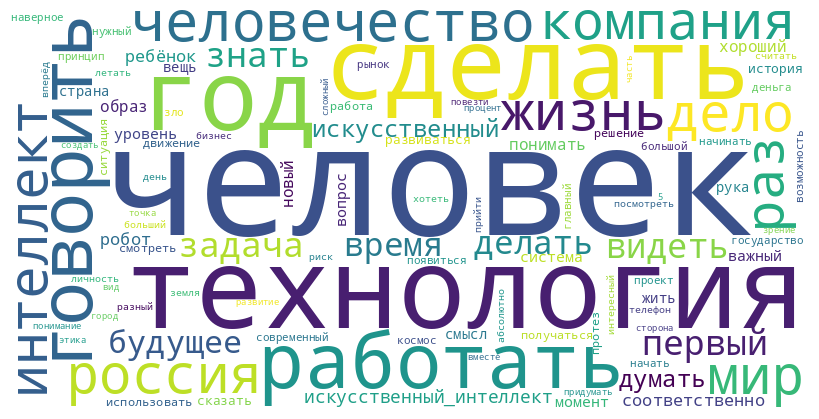

In [45]:
import spacy
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models import Phrases
from gensim.models.phrases import Phraser

# Загрузка модели spacy для русского языка
nlp = spacy.load("ru_core_news_sm")

# Обработка текста с помощью spacy
doc = nlp(text)

# Функция для лемматизации и фильтрации стоп-слов и пунктуации
def preprocess(doc):
    tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct and not token.is_space:
            tokens.append(token.lemma_)
    return tokens

# Предобработка текста
tokens = preprocess(doc)

# Создание биграмм с использованием gensim
phrases = Phrases([tokens], min_count=2, threshold=1)
bigram = Phraser(phrases)

# Извлечение биграмм 
bigrams = bigram[tokens]

#FIXed by human: 
bigrams = [x for x in bigrams if '_' in x]

# Комбинирование слов и фраз
all_terms = tokens + list(bigrams) 

# Подсчет частотности терминов
term_freq = Counter(all_terms)

# Создание облака тегов
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate_from_frequencies(term_freq)

# Визуализация облака тегов
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [43]:
Counter(bigrams).most_common(5)

[('искусственный_интеллект', 15),
 ('точка_зрение', 5),
 ('добро_зло', 5),
 ('человек_начинать', 4),
 ('50_год', 4)]